<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/GradientBoost/gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
#100 random numbers in the range of -0.5 to +0.5
y = 3 * x[:, 0] ** 2 + 0.05 * np.random.randn(100)
# y is the target variable, with a quadratic function
# and generating 100 small random values with mean 0 and standard deviation 0.05


In [3]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [4]:
import pandas as pd


In [5]:
df = pd.DataFrame()

In [6]:
df['x'] = x.reshape(100)
df['y'] = y

In [8]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

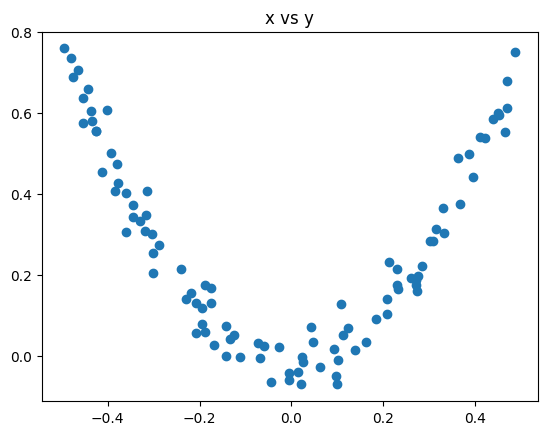

In [9]:
plt.scatter(df['x'], df['y'])
plt.title('x vs y')

In [11]:
df['pred1'] = df['y'].mean()

In [12]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [13]:
df['res1'] = df['y'] - df['pred1']

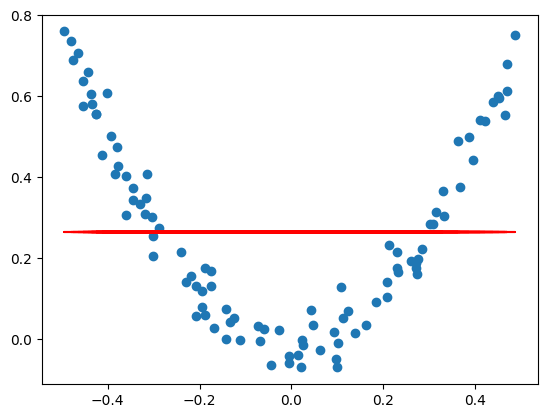

In [14]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], color='red')

In [15]:
from sklearn.tree import DecisionTreeRegressor


In [16]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [18]:
tree1.fit(df['x'].values.reshape(100, 1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

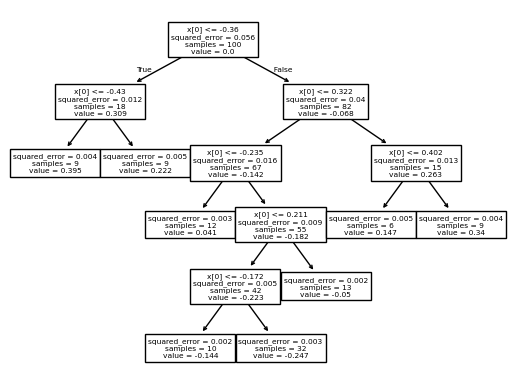

In [19]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [20]:
# generating x_test
x_test = np.linspace(-0.5, 0.5, 500)

In [21]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(500, 1))

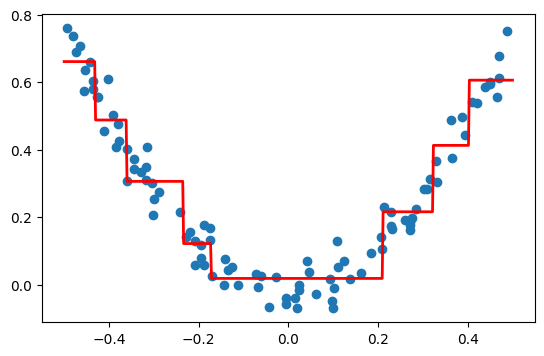

In [22]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])

In [23]:
df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100, 1))

In [24]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [25]:
df['res2'] = df['y'] - df['pred2']

In [26]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [27]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [28]:
tree2.fit(df['x'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [29]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tree1, tree2])

Text(0.5, 1.0, 'x vs y')

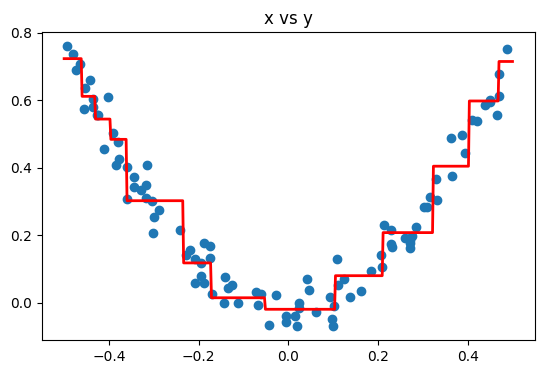

In [30]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])
plt.title('x vs y')

In [32]:
def gradient_boost(x, y, number, lr, count=1, regs=[], foo=None):
  if number == 0:
    return
  else:
    # do gradient boosting
    if count > 1:
      y = y - regs[-1].predict(x)
    else:
      foo = y
    tree_reg = DecisionTreeRegressor(max_leaf_nodes=8)
    tree_reg.fit(x, y)
    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(x[:, 0], foo, "r.")
    plt.show()

    return gradient_boost(x, y, number - 1, lr, count + 1, regs, foo=foo)

6


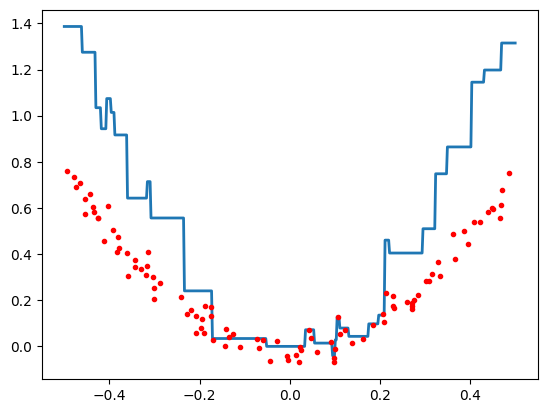

5


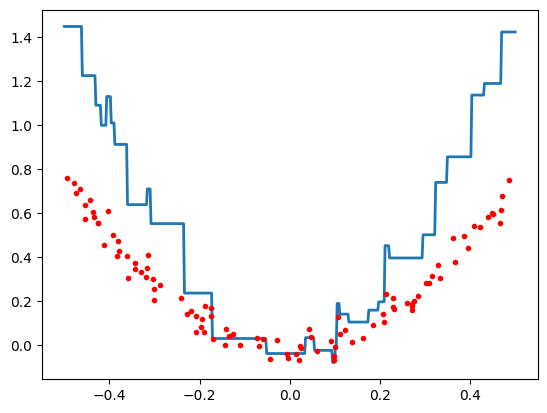

4


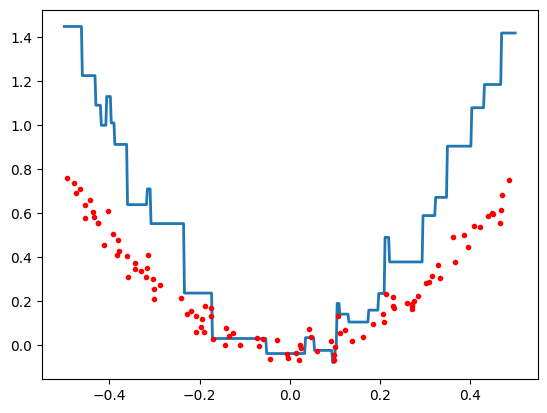

3


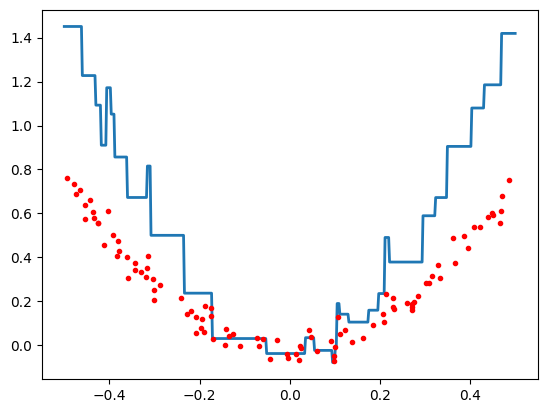

2


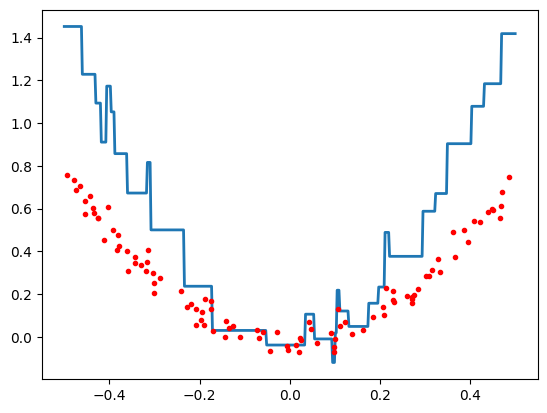

1


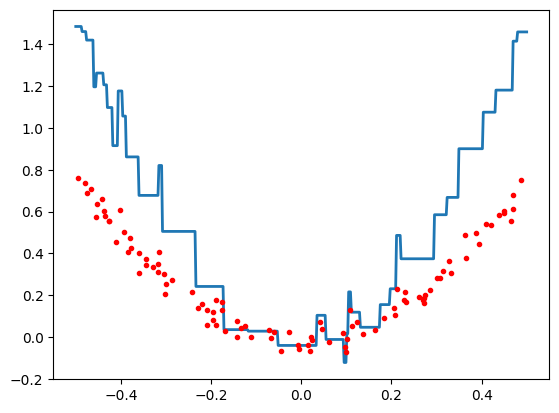

In [34]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3 * x[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(x, y, 6, lr=1)